# Семинар по трехмерной геометрии и градиентному спуску

### Визуализация функции от двух переменных

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
%matplotlib inline

In [2]:
def plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=None):
    """
    Визуализирует функцию fun на квадрате [a, b] x [c, d]
    fun : функция, принимающая два аргумента 
         (np.array одинакового размера) и возвращающая
          np.array того же размера со значениями функции
          в соответствующих точках
    Дополнительно возможно нарисовать ломаную линию из N точек,
    лежащую на получившейся поверхности
    trace : np.array размера N x 2 - координаты на плоскости,
            обозначающие точки ломаной
    """
    fig = plt.figure()

    # Make grid
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y = fun(x1, x2)

    # Plot the surface
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y, alpha=0.6)
    ax.contour(x1, x2, y, zdir='z', 
                  offset=y.min(), cmap=cm.coolwarm)
    
    # Plot 3d line 
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y.min(), y.max())

Вам дана функция, визуализирующая поверхности. Ознакомьтесь с ее интерфейсом.

Например, отобразим трехмерную параболу:

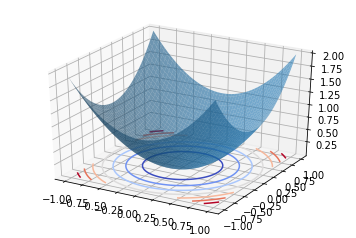

In [4]:
fun = lambda x1, x2: x1**2 + x2**2
# def fun(x1, x2):
#     return x1**2 + x2**2
plot_3d(fun)

Круги на плоскости показывают проекции линий уровня поверхности.

Нарисуйте плоскость $y = x_1 + 2 x_2 + 3$:

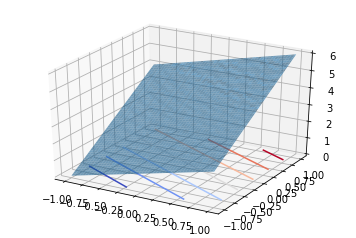

In [6]:
# your code here
plot_3d(lambda x1, x2: x1+2*x2+3)

Нарисуйте плоскость, параллельную любой из горизонтальных осей:

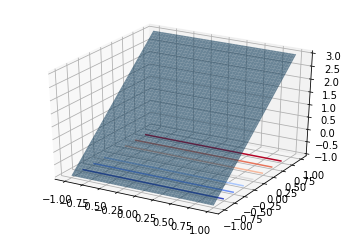

In [7]:
# your code here
plot_3d(lambda x1, x2: 2*x2 + 1)

Нарисуйте плоскость, проходящую через начало координат:

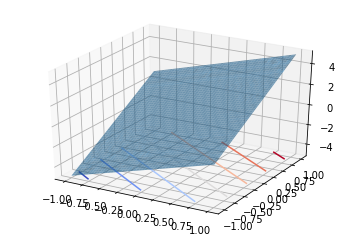

In [8]:
# your code here
plot_3d(lambda x1, x2: 2*x1 + 3*x2)

### Вычисление градиентов функции

Градиент функции $f(x) = f(x_1, \dots, x_d)$ от многих переменных - это вектор ее частных производных.
$$\nabla_x f = \biggl(\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_1} \biggr )$$

Разберем два простых примеры вычисления градиента в случае функции от двух переменных.

__Теоретическая задача 1.__ Найдите градиент линейной функции $f(x) = f(x_1, x_2) = c_1 x_1 + c_2 x_2$ ($c_1$ и $c_2$ - фиксированные числа). 

$$\nabla_x f = (c_1, c_2)$$

Если непонятно, можно взять конкретные коэффициенты, например $c_1 = 3$ и $c_2 = 7$. 

__Теоретическая задача 2.__ Найдите градиент квадратичной функции $f(x) = f(x_1, x_2) = c_1 x_1^2 + c_2 x_2^2$ ($c_1$ и $c_2$ - фиксированные числа). 

$$\nabla_x f = (2 c_1 x_1, 2 c_2 x_2)$$

Если $c1=c2=c$, $\nabla_x f = 2cx$.

Ясно, что минимум такой квадратичной функции достигается в 0.
Наша следующая цель - найти этот минимум с помощью градиентного спуска. 

Воспользуемся кодом квадратичной функции (выше) и обобщим ее на случай любых коэффициентов:

In [28]:
def fun(x1, x2, c1=1, c2=1):
    return c1*x1**2 + c2*x2**2

Теперь надо реализовать ее градиент. Напишите код функции вычисления градиента в одной точке согласно описанию:

In [29]:
def grad_fun(x1, x2, c1=1, c2=1):
    """
    Функция берет 2 числа, обозначающую точку вычисления градиента,
    и возвращает np.array размера (2,) - градиент квадратичной функции
    Опциональные аргументы: c1 и c2 - коэффициенты
    """
    return np.array([2*c1*x1, 2*c2*x2])
    

Проверьте правильность (сверьте с формулой):

In [12]:
grad_fun(x1=0.5, x2=1.5, c1=2, c2=3)

array([ 2.,  9.])

Теперь реализуем градиентны спуск. 
Он работает следующим образом: 
1. сначала инициализируется начальная точка x (это уже сделано)
1. затем повторяются итерации:
$$x = x - \alpha \nabla_x f$$
Здесь $\alpha$ - длина шага.

Допишите функцию согласно описанию:

In [13]:
def grad_descend(grad_fun, step_size=0.1, num_steps=20):
    """
    Реализует градиентный спуск
    Аргументы:
    * grad_fun - функция, вычисляющая градиент
    * step_size - длина шага
    * num_steps - число итераций
    
    Возвращает np.array размера (num_steps+1) x 2, 
    (i+1)-й элемент - точка на (i+1)-й итеарации,
    нулевой элемент - случайная инициализация
    """
    x = np.random.rand(2) * 4 - 2
    trace = np.zeros((num_steps+1, 2))
    trace[0] = x
    for k in range(num_steps):
        grad = grad_fun(x[0], x[1]) # np.array with shape (2,)
        x = x - step_size * grad
        trace[k+1] = x
    return trace
    

Протестируем функцию (последний элемент должен быть близок к 0):

In [15]:
trace = grad_descend(grad_fun)
trace

array([[ 1.80393236, -0.49951389],
       [ 1.44314589, -0.39961111],
       [ 1.15451671, -0.31968889],
       [ 0.92361337, -0.25575111],
       [ 0.73889069, -0.20460089],
       [ 0.59111256, -0.16368071],
       [ 0.47289004, -0.13094457],
       [ 0.37831204, -0.10475566],
       [ 0.30264963, -0.08380452],
       [ 0.2421197 , -0.06704362],
       [ 0.19369576, -0.0536349 ],
       [ 0.15495661, -0.04290792],
       [ 0.12396529, -0.03432633],
       [ 0.09917223, -0.02746107],
       [ 0.07933778, -0.02196885],
       [ 0.06347023, -0.01757508],
       [ 0.05077618, -0.01406007],
       [ 0.04062095, -0.01124805],
       [ 0.03249676, -0.00899844],
       [ 0.02599741, -0.00719875],
       [ 0.02079792, -0.005759  ]])

Теперь мы готовы визуализировать градиентный спуск. Для этого передайте нашу траекторию оптимизации в качестве последнего аргумента функции plot_3d.

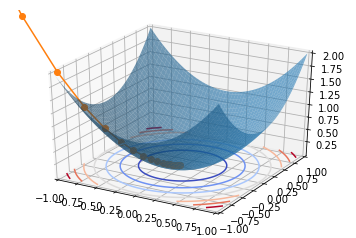

In [21]:
trace = grad_descend(grad_fun)
plot_3d(fun, trace=trace)

Может потребоваться запустить ячейку пару раз, чтобы траекторию было лучше видно.

Запустите оптимизацию несколько раз, чтобы посмотреть, как ведет себя процесс в зависимости от начального приближения:

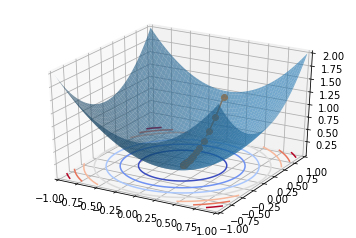

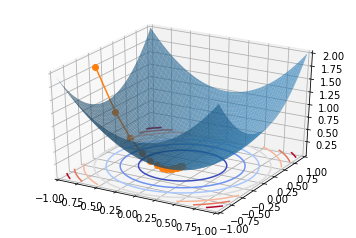

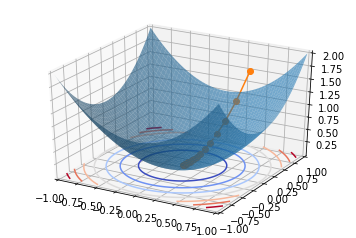

In [22]:
for i in range(3):
    trace = grad_descend(grad_fun)
    plot_3d(fun, trace=trace)

Попробуйте разную длину шага (0.01, 0.1, 0.5, 1). Рекомендуется перед запуском градиентного спуска написать np.random.seed(<число>), чтобы все запуски были из одного начального приближения.

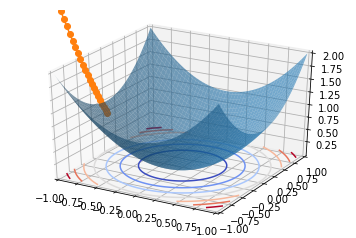

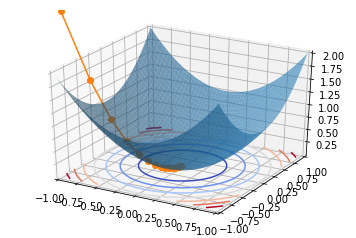

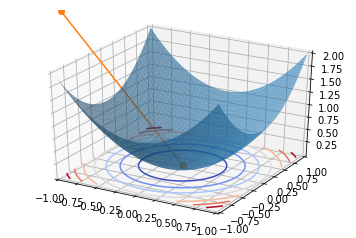

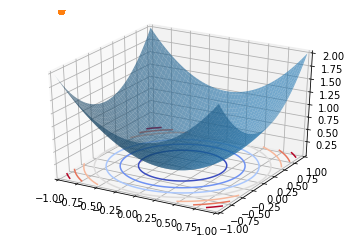

In [26]:
for ss in [0.01, 0.1, 0.5, 1]:
    np.random.seed(2)
    trace = grad_descend(grad_fun, step_size=ss)
    plot_3d(fun, trace=trace)

При маленькой длине шага процесс идет сишком медленно, при большой - может разойтись.

Наконец, попробуем использовать другие коэффициенты. Оптимизируйте функцию $f(x) = x_1^2 + 5 x_2^2$, пробуя длину шага (0.1, 0.2, 0.5):

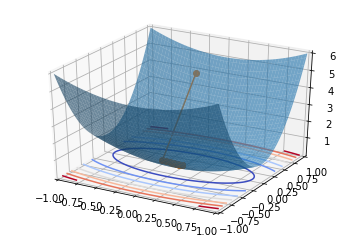

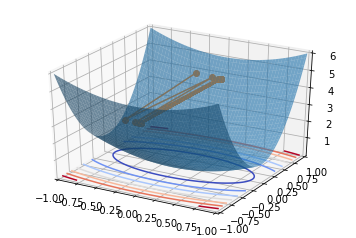

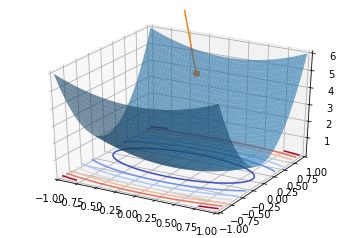

In [32]:
### your code here
fun1 = lambda x1, x2: fun(x1, x2, c1=1, c2=5)
grad_fun1 = lambda x1, x2: grad_fun(x1, x2, c1=1, c2=5)
for ss in [0.1, 0.2, 0.5]:
    np.random.seed(1)
    trace = grad_descend(grad_fun1, step_size=ss)
    plot_3d(fun1, trace=trace)

"Вытянутую" функцию сложнее оптимизировать. Именно поэтмоу данные рекомендуется нормировать перед обучением модели, чтобы избежать таких колебаний при оптимизации.